# LioJotstar Merger: Data Analysis with Python for Strategic Optimization

## 10. Streaming Insights: Watch Time, Devices & User Segments
This notebook investigates streaming insights on LioCinema and Jotstar, focusing on how watch time varies across different device types, city tiers, subscription plans, and age groups. It also explores the correlation between user activity levels and average watch time using grouped bar chart, heatmaps, pie charts, population pyramid, and line chart to understand user engagement patterns on each platform.

### Importing Required Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

### Loading Required DataFrames from Saved Parquet Files

In [6]:
try:
    jotstar_subscribers_df = pd.read_parquet('Parquet Data Files/03. Feature Engineering/Jotstar_db/subscribers.parquet')
    print("Jotstar - Subscribers table loaded successfully.")
    jotstar_content_consumption_df = pd.read_parquet('Parquet Data Files/02. Data Wrangling/Jotstar_db/content_consumption.parquet')
    print("Jotstar - Content Consumption table loaded successfully.")
    liocinema_subscribers_df = pd.read_parquet('Parquet Data Files/03. Feature Engineering/LioCinema_db/subscribers.parquet')
    print("LioCinema - Subscribers table loaded successfully.")
    liocinema_content_consumption_df = pd.read_parquet('Parquet Data Files/02. Data Wrangling/LioCinema_db/content_consumption.parquet')
    print("LioCinema - Content Consumption table loaded successfully.")
    print("\nData Loading Complete.")
    
except FileNotFoundError as e:
       print("Error: One or more Parquet files not found. Please check the file paths.")
       print(f"Details: {e}")
except Exception as e:
       print("An error occurred during data import.")
       print(f"Details: {e}")

Jotstar - Subscribers table loaded successfully.
Jotstar - Content Consumption table loaded successfully.
LioCinema - Subscribers table loaded successfully.
LioCinema - Content Consumption table loaded successfully.

Data Loading Complete.


### Data Analysis & Visualization

Text(0.5, 0, 'Total Watch Time (in Millions)')

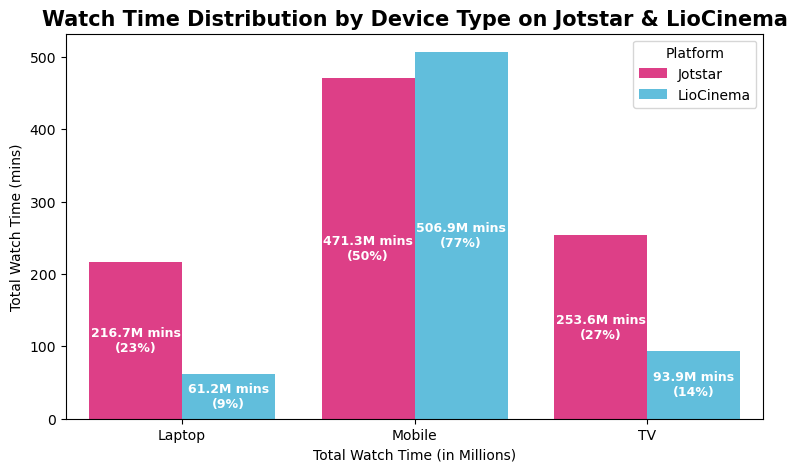

In [8]:
def get_user_count(df):
    result = df.groupby('Device Type')['Total Watch Time (mins)'].sum().reset_index()
    total_watch_time = result['Total Watch Time (mins)'].sum()  
    result['Watch Time (%)'] = (result['Total Watch Time (mins)'] / total_watch_time) * 100
    result['Total Watch Time (mins)'] /= 1_000_000
    return result
    
jotstar_temp_df = get_user_count(jotstar_content_consumption_df)
liocinema_temp_df = get_user_count(liocinema_content_consumption_df)
jotstar_temp_df['Platform'] = "Jotstar"
liocinema_temp_df['Platform'] = "LioCinema"
merged_df = pd.concat([jotstar_temp_df, liocinema_temp_df])

plt.figure(figsize = (9, 5))
plt.title("Watch Time Distribution by Device Type on Jotstar & LioCinema", fontsize = 15, fontweight = "bold", ha = "center")

bp = sns.barplot(merged_df, x = 'Device Type', y = 'Total Watch Time (mins)', hue = 'Platform', palette = ["#F72585", "#4CC9F0"] )
for bar, time, pct in zip(bp.patches, merged_df['Total Watch Time (mins)'], merged_df['Watch Time (%)']):
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_y() + bar.get_height() / 2
    label = f"{time:.1f}M mins\n({pct:.0f}%)"  
    plt.text(x, y, label, ha = "center", va = "center", fontsize = 9, color = "white", fontweight = "bold")

plt.xlabel("Total Watch Time (in Millions)")

<Axes: title={'center': 'LioCinema: Average Watch Time (hrs) by City Tier & Device Type'}, xlabel='City Tier', ylabel='Device Type'>

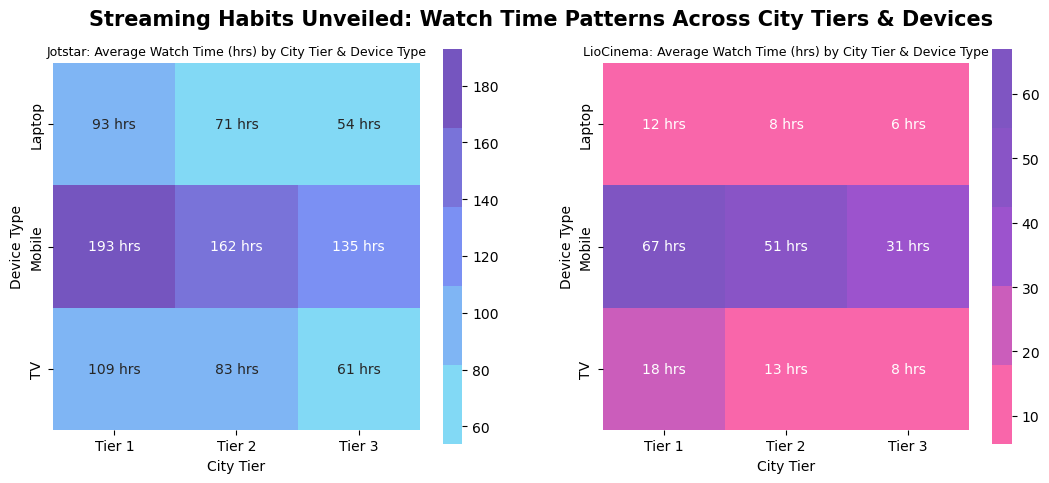

In [9]:
def get_user_count(df1, df2):
    temp_df = pd.merge(df1, df2, on = 'User ID', how = 'left')  
    result = temp_df.groupby(['City Tier', 'Device Type'])['Total Watch Time (mins)'].mean().reset_index()
    result = result.rename(columns = {'Total Watch Time (mins)' : 'Average Watch Time (mins)'})
    result['Average Watch Time (hrs)'] = result['Average Watch Time (mins)'] / 60
    return result
    
jotstar_temp_df = get_user_count(jotstar_subscribers_df, jotstar_content_consumption_df)
liocinema_temp_df = get_user_count(liocinema_subscribers_df, liocinema_content_consumption_df)

plt.figure(figsize = (13, 5))
plt.subplots_adjust(top = 0.9)
plt.suptitle("Streaming Habits Unveiled: Watch Time Patterns Across City Tiers & Devices", fontsize = 15, fontweight = "bold", ha = "center")

Jotstar = ["#82D9F5", "#7FB5F4", "#7B90F3", "#7973D9", "#7555BF"]
LioCinema = ["#F966AA", "#CB5DBB", "#9C53CD", "#8954C6", "#7F55C2"]

ax1 = plt.subplot(1, 2, 1)
ax1.set_aspect("equal")
plt.title("Jotstar: Average Watch Time (hrs) by City Tier & Device Type", fontsize = 9)
jotstar_pivot_df = jotstar_temp_df.pivot_table(columns = 'City Tier', index = 'Device Type', values = 'Average Watch Time (hrs)')
sns.heatmap(jotstar_pivot_df, annot = jotstar_pivot_df.map(lambda x: f"{x:.0f} hrs"), cmap = ListedColormap(Jotstar), fmt = "")

ax2 = plt.subplot(1, 2, 2)
ax2.set_aspect("equal")
plt.title("LioCinema: Average Watch Time (hrs) by City Tier & Device Type", fontsize = 9)
liocinema_pivot_df = liocinema_temp_df.pivot_table(columns = 'City Tier', index = 'Device Type', values = 'Average Watch Time (hrs)')
sns.heatmap(liocinema_pivot_df, annot = liocinema_pivot_df.map(lambda x: f"{x:.0f} hrs"), cmap = ListedColormap(LioCinema), fmt = "")

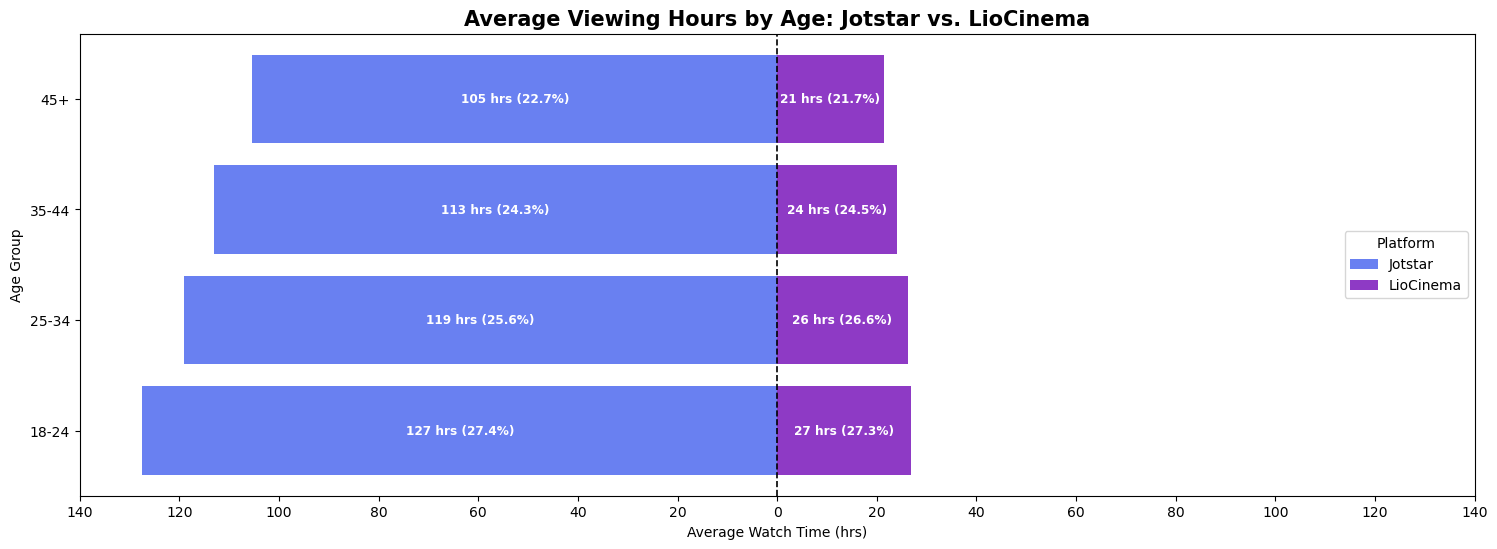

In [10]:
def get_user_count(df1, df2):
    temp_df = pd.merge(df1, df2, on = 'User ID', how = 'left')  
    result = temp_df.groupby('Age Group')['Total Watch Time (mins)'].mean().reset_index()
    result = result.rename(columns = {'Total Watch Time (mins)' : 'Average Watch Time (mins)'})
    result['Average Watch Time (hrs)'] = result['Average Watch Time (mins)'] / 60
    return result
    
jotstar_temp_df = get_user_count(jotstar_subscribers_df, jotstar_content_consumption_df)
jotstar_temp_df['Average Watch Time (hrs)'] *= -1
liocinema_temp_df = get_user_count(liocinema_subscribers_df, liocinema_content_consumption_df)

plt.subplots(figsize = (18, 6))
plt.title("Average Viewing Hours by Age: Jotstar vs. LioCinema", fontsize = 15, fontweight = "bold")

bars_js = plt.barh(jotstar_temp_df['Age Group'], jotstar_temp_df['Average Watch Time (hrs)'], color = "#4361EE", label = "Jotstar", 
                   alpha = 0.8)

bars_lc = plt.barh(liocinema_temp_df['Age Group'], liocinema_temp_df['Average Watch Time (hrs)'], color = "#7209B7", label = "LioCinema", 
                   alpha = 0.8)

for bar in bars_js:
    value = abs(bar.get_width())
    pct = ((abs(bar.get_width())) / abs(jotstar_temp_df['Average Watch Time (hrs)'].sum()))* 100
    plt.text(bar.get_width() / 2, bar.get_y() + bar.get_height()/2, 
             f"{value:.0f} hrs ({pct:.1f}%)", 
             va = "center", ha = "center", color = "white", fontsize = 8.7, fontweight = "bold")

for bar in bars_lc:
    value = bar.get_width()
    pct = (bar.get_width() / liocinema_temp_df['Average Watch Time (hrs)'].sum())* 100
    plt.text(bar.get_width() / 2, bar.get_y() + bar.get_height()/2,  
             f"{value:.0f} hrs ({pct:.1f}%)",  
             va = "center", ha = "center", color = "white", fontsize = 8.7, fontweight = "bold")

plt.xlabel("Average Watch Time (hrs)")
plt.ylabel("Age Group")
plt.axvline(0, color = "black", linewidth = 1.2, linestyle = "dashed")
plt.xticks(ticks = [-140, -120, -100, -80, -60, -40, -20, 0, 20, 40, 60, 80, 100, 120, 140], 
           labels = ["140", "120", "100", "80", "60", "40", "20", "0", "20", "40", "60", "80", "100", "120", "140"])
plt.legend(title = "Platform", loc = "center right")

([<matplotlib.patches.Wedge at 0x202005628d0>,
 [Text(0.1810110039477236, 1.0850046158656825, 'Premium'),
  Text(-0.8931776388743985, -0.6420542854110974, 'Basic'),
  Text(0.7802789857727518, -0.7753481181775357, 'Free')],
 [Text(0.0987332748805765, 0.5918206995630996, '45%\n(40 hrs)'),
  Text(-0.4871878030223991, -0.35021142840605307, '30%\n(27 hrs)'),
  Text(0.42560671951241, -0.4229171553695649, '25%\n(22 hrs)')])

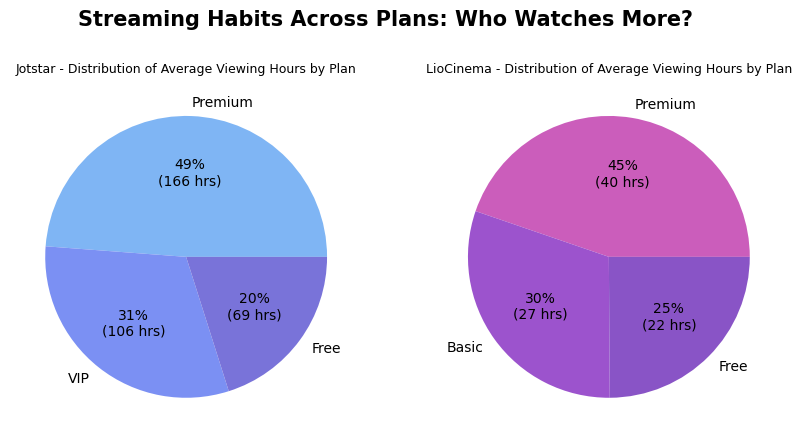

In [11]:
def get_user_count(df1, df2):
    temp_df = pd.merge(df1, df2, on = 'User ID', how = 'left')  
    result = temp_df.groupby('New Subscription Plan')['Total Watch Time (mins)'].mean().reset_index()
    result = result.rename(columns = {'New Subscription Plan':'Subscription Plan','Total Watch Time (mins)':'Average Watch Time (mins)'})
    result['Average Watch Time (hrs)'] = result['Average Watch Time (mins)'] / 60
    result = result.sort_values('Average Watch Time (hrs)', ascending = False)
    return result
    
jotstar_temp_df = get_user_count(jotstar_subscribers_df, jotstar_content_consumption_df)
liocinema_temp_df = get_user_count(liocinema_subscribers_df, liocinema_content_consumption_df)

plt.figure(figsize = (10, 5))
plt.subplots_adjust(top = 0.86)
plt.suptitle("Streaming Habits Across Plans: Who Watches More?", fontsize = 15, fontweight = "bold")

Jotstar = ["#7FB5F4", "#7B90F3", "#7973D9"]
LioCinema = ["#CB5DBB", "#9C53CD", "#8954C6"]

ax1 = plt.subplot(1, 2, 1)
ax1.set_aspect("equal")
plt.title("Jotstar - Distribution of Average Viewing Hours by Plan", fontsize = 9)
plt.pie(jotstar_temp_df['Average Watch Time (mins)'], labels = jotstar_temp_df['Subscription Plan'], 
        autopct = lambda p: f'{p:.0f}%\n({p * sum(jotstar_temp_df['Average Watch Time (hrs)']) / 100:.0f} hrs)', colors = Jotstar)

ax2 = plt.subplot(1, 2, 2)
ax2.set_aspect("equal")
plt.title("LioCinema - Distribution of Average Viewing Hours by Plan", fontsize = 9)
plt.pie(liocinema_temp_df['Average Watch Time (mins)'], labels = liocinema_temp_df['Subscription Plan'], 
        autopct = lambda p: f'{p:.0f}%\n({p * sum(liocinema_temp_df['Average Watch Time (hrs)']) / 100:.0f} hrs)', colors = LioCinema)

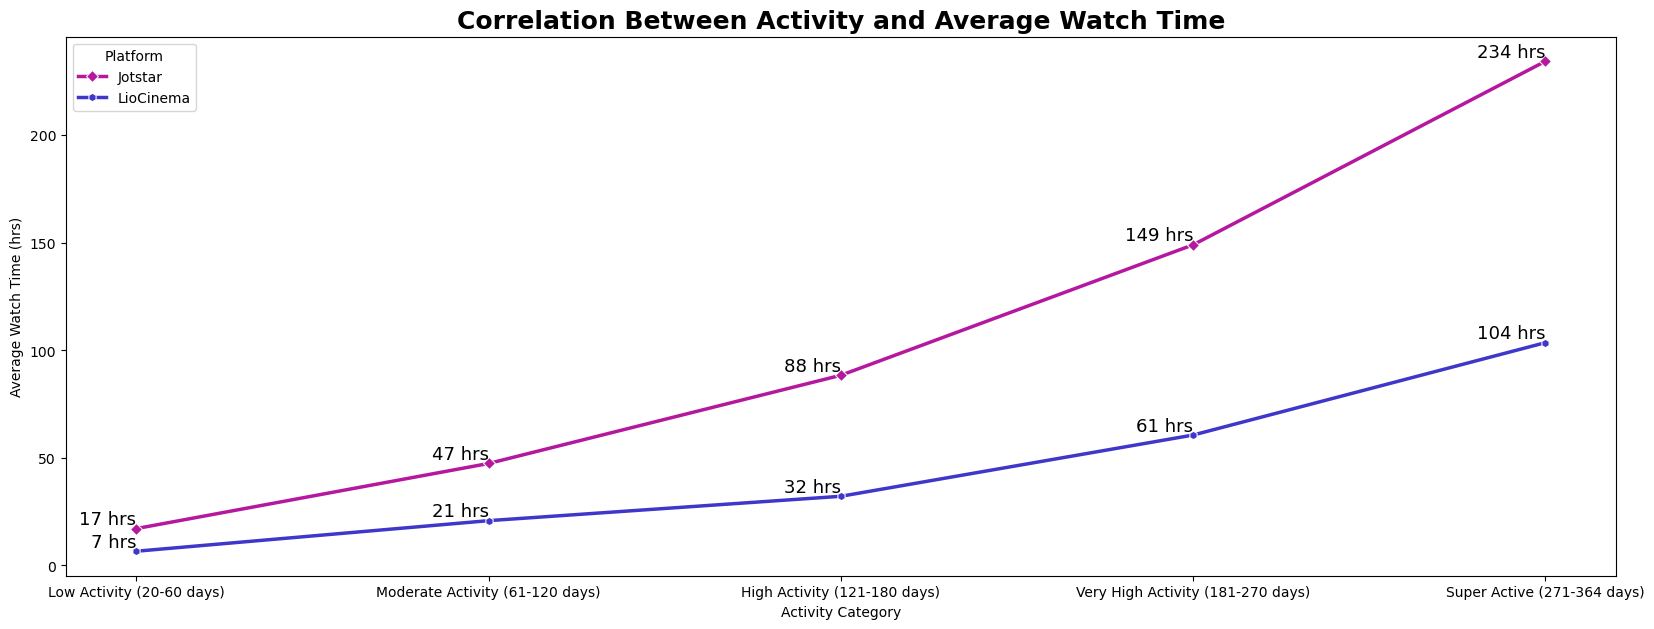

In [12]:
def get_user_count(df1, df2):
    temp_df = pd.merge(df1, df2, on = 'User ID', how = 'left')  
    temp_df['Last Active Date'] = temp_df['Last Active Date'].fillna("2024-12-30")
    
    def get_days_of_activity(df):
        df["Total Days of Activity"] = (df['Last Active Date'] - df['Subscription Date']).dt.days
        df["Total Days of Activity"] = df["Total Days of Activity"].fillna(0)
        df["Total Days of Activity"] = df["Total Days of Activity"].astype(int)
        return df
        
    temp_df = get_days_of_activity(temp_df)
    result = temp_df.groupby('Total Days of Activity')['Total Watch Time (mins)'].mean().reset_index()
    result = result.rename(columns = {'Total Watch Time (mins)':'Average Watch Time (mins)'})
    result['Average Watch Time (hrs)'] = result['Average Watch Time (mins)'] / 60
    return result

def categorize_activity(days_of_activity):
    if 20 <= days_of_activity <= 60:
        return "Low Activity (20-60 days)"
    elif 61 <= days_of_activity <= 120:
        return "Moderate Activity (61-120 days)"
    elif 121 <= days_of_activity <= 180:
        return "High Activity (121-180 days)"
    elif 181 <= days_of_activity <= 270:
        return "Very High Activity (181-270 days)"
    else:
        return "Super Active (271-364 days)"
        
jotstar_temp_df = get_user_count(jotstar_subscribers_df, jotstar_content_consumption_df)
jotstar_temp_df['Activity Category'] = jotstar_temp_df['Total Days of Activity'].apply(categorize_activity)
jotstar_temp_df['Platform'] = "Jotstar"
liocinema_temp_df = get_user_count(liocinema_subscribers_df, liocinema_content_consumption_df)
liocinema_temp_df['Activity Category'] = liocinema_temp_df['Total Days of Activity'].apply(categorize_activity)
liocinema_temp_df['Platform'] = "LioCinema"
merged_df = pd.concat([jotstar_temp_df, liocinema_temp_df])

category_order = [
    "Low Activity (20-60 days)",
    "Moderate Activity (61-120 days)",
    "High Activity (121-180 days)",
    "Very High Activity (181-270 days)",
    "Super Active (271-364 days)"
]

final_df = merged_df.groupby(['Platform', 'Activity Category'])['Average Watch Time (hrs)'].mean().reset_index()
final_df['Activity Category'] = pd.Categorical(final_df['Activity Category'], categories = category_order, ordered = True)

plt.figure(figsize = (20, 7))
plt.title("Correlation Between Activity and Average Watch Time", fontsize = 18, fontweight = "bold")

sns.lineplot(data = final_df, x = 'Activity Category', y = 'Average Watch Time (hrs)', hue = 'Platform', palette = ["#B5179E", "#3F37C9"],
            style = 'Platform', markers = {'Jotstar': 'D', 'LioCinema': 'h'}, linewidth = 2.5, dashes = False)

for i, row in final_df.iterrows():
    plt.text(row['Activity Category'], row['Average Watch Time (hrs)'], 
             f"{row['Average Watch Time (hrs)']:.0f} hrs", 
             ha = "right", va = "bottom", fontsize = 13)

## Next Notebook: "11. Monetizing Content: Revenue Patterns from User Engagement"